In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Расчет ROC-AUC на train и test, вывод графика
def plot_roc_curve(model, X_train_scaled, X_test_scaled, y_train, y_test):
    y_train_proba = model.predict_proba(X_train_scaled)[:, 1]
    y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    print(f'Train ROC-AUC: {roc_auc_score(y_train, y_train_proba)}')
    print(f'Test  ROC-AUC: {roc_auc_score(y_test, y_test_proba)}')

    plt.figure(figsize=(12, 10))
    plt.plot(*roc_curve(y_train, y_train_proba)[:2], label='train ROC-AUC')
    plt.plot(*roc_curve(y_test, y_test_proba)[:2], label='test ROC-AUC')
    plt.plot([0, 1], [0, 1], linestyle='--', color='black')
    plt.grid(True)
    plt.legend()
    plt.show()  

In [3]:
def err_counter(model, X_test_scaled, y_test):
    pred = model.predict(X_test_scaled)
    err_count_0 = 0
    err_count_1 = 0
    for i in range(len(y_test)):
        if y_test[i] != pred[i]:
            if y_test[i] == 0:
                err_count_0 += 1
            else:
                err_count_1 += 1

    print(f'err_count_0 = {err_count_0} / {(y_test == 0).sum()}, err_count_1 = {err_count_1} / {(y_test == 1).sum()}')
    print(f'acc = {1 - (err_count_0 + err_count_1) / len(y_test)}')

In [4]:
df = pd.read_csv('data/train_dataset_Самолет.csv', index_col=[0])
df.head()

,client_id,target,col1,col2,col3,col4,col5,col6,col7,col8,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
report_date,,,,,,,,,,,,,,,,,,,,,
2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164


In [5]:
perc10 = len(df) / 100 * 50
perc10 = df.count()[df.count() < perc10].index
df = df.drop(columns=perc10)
df

,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,col1460,...,col2564,col2565,col2566,col2588,col2589,col2590,col2660,col2661,col2662,col2663
report_date,,,,,,,,,,,,,,,,,,,,,
2022-11-01,1,0,0,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,1.0,...,5903704.0,5903704.0,5903704.0,362.0,362.0,362.0,7616803.0,7616803.0,7616803.0,0.256261
2022-05-01,6,0,0,0278175e-c0bb-4e1e-bfe5-20db6811d3e2,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
2022-09-01,7,0,0,0364571d-5325-ed11-b823-005056b825cd,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
2022-08-01,8,0,0,065957a6-9b2a-435a-b561-024e9e8d9ad7,0.0,0.0,0.0,0.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,1241,0,0,fc4b5aa0-c4d6-4394-93db-57a1505e66c4,0.0,0.0,0.0,0.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
2022-09-01,1969,1,0,fcc827d8-b64b-4b59-b718-87f2a51d77a4,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
2022-02-01,7116,1,0,fd5f22f5-36f6-4dca-9896-8c9e90bbb702,0.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005


In [6]:
#убираем категории 
df.drop(df.select_dtypes(include=['object']).columns, axis= 1 , inplace= True)
df.drop('client_id', axis= 1 , inplace= True)

In [7]:
#Заполняем пропуски
df.fillna(value=0,  inplace=True) 
df

,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,col1461,col1462,...,col2564,col2565,col2566,col2588,col2589,col2590,col2660,col2661,col2662,col2663
report_date,,,,,,,,,,,,,,,,,,,,,
2022-11-01,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256261
2022-11-01,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,5903704.0,5903704.0,5903704.0,362.0,362.0,362.0,7616803.0,7616803.0,7616803.0,0.256261
2022-05-01,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256261
2022-09-01,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258682
2022-08-01,0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,0,0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276902
2022-09-01,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.260516
2022-02-01,1,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.260005


In [8]:
X = df.drop('target', axis= 1)
y = df['target']

In [9]:
X_0 = X[y==0]
X_1 = X[y==1]

print(f'{len(X_0)} ({len(X_0) / len(X)}), {len(X_1)} ({len(X_1) / len(X)})')

14020 (0.9698395130049806), 436 (0.03016048699501937)


In [10]:
idxs = np.arange(len(X_0))
np.random.shuffle(idxs)

In [11]:
X2 = pd.concat([X_0.iloc[idxs[:len(X_1)]], X_1])
X2

,col1453,col1455,col1456,col1457,col1458,col1459,col1460,col1461,col1462,col1463,...,col2564,col2565,col2566,col2588,col2589,col2590,col2660,col2661,col2662,col2663
report_date,,,,,,,,,,,,,,,,,,,,,
2023-02-01,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256919
2022-04-01,0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,4815000.0,4815000.0,4815000.0,360.0,360.0,360.0,5500000.0,5500000.0,5500000.0,0.256261
2022-03-01,0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.266054
2023-02-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256261
2022-12-01,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,7905000.0,7905000.0,7905000.0,360.0,360.0,360.0,8695000.0,8695000.0,8695000.0,0.257017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.265721
2023-01-01,0,0.0,3.0,3.0,3.0,3.0,3.0,0.0,3.0,0.0,...,7822898.0,7822898.0,7822898.0,360.0,360.0,360.0,7822898.0,7822898.0,7822898.0,0.259929
2021-09-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5476452.0,5476452.0,5476452.0,300.0,300.0,300.0,5475769.0,5475769.0,5475769.0,0.256261


In [12]:
y2 = np.concatenate([np.zeros((len(X_1),)), np.ones((len(X_1),))])
y2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.33, random_state=42, stratify=y2)
print(len(y_train[y_train==1]) / len(y_train))
print(len(y_test[y_test==1]) / len(y_test))

print(len(y_train[y_train==0]) / len(y_train))
print(len(y_test[y_test==0]) / len(y_test))

0.5
0.5
0.5
0.5


In [14]:
# Нормализуем данные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## DecisionTreeClassifier

Train ROC-AUC: 1.0
Test  ROC-AUC: 0.7048611111111112


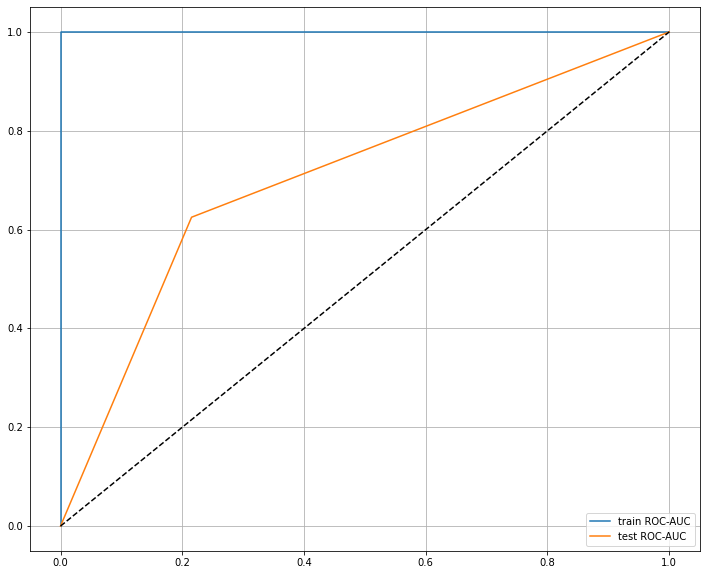

err_count_0 = 31 / 144, err_count_1 = 54 / 144
acc = 0.7048611111111112


In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
plot_roc_curve(model, X_train_scaled, X_test_scaled, y_train, y_test)

err_counter(model, X_test_scaled, y_test)

## RandomForestClassifier

Train ROC-AUC: 1.0
Test  ROC-AUC: 0.9211033950617284


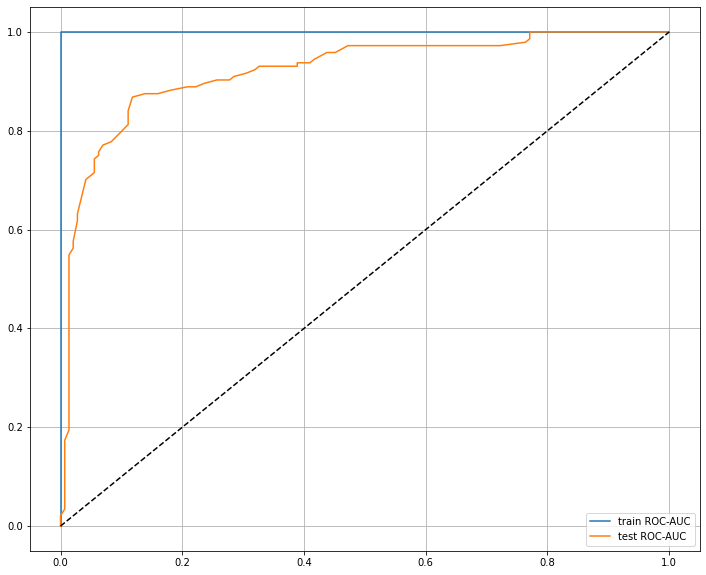

err_count_0 = 20 / 144, err_count_1 = 18 / 144
acc = 0.8680555555555556


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)
plot_roc_curve(model, X_train_scaled, X_test_scaled, y_train, y_test)

err_counter(model, X_test_scaled, y_test)

## CatBoostClassifier

Train ROC-AUC: 0.9984870519797335
Test  ROC-AUC: 0.9169077932098766


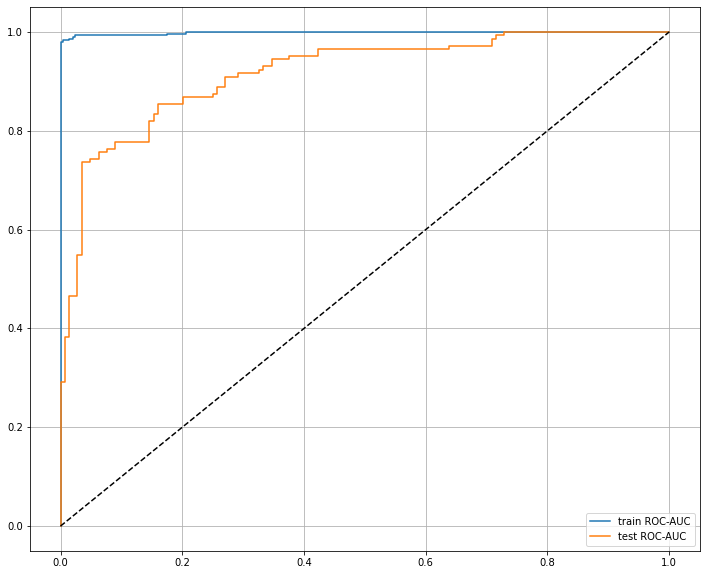

err_count_0 = 23 / 144, err_count_1 = 23 / 144
acc = 0.8402777777777778


In [18]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(verbose=False)
model.fit(X_train_scaled, y_train)
plot_roc_curve(model, X_train_scaled, X_test_scaled, y_train, y_test)

err_counter(model, X_test_scaled, y_test)

## LGBMClassifier

[LightGBM] [Info] Number of positive: 292, number of negative: 292
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6359
[LightGBM] [Info] Number of data points in the train set: 584, number of used features: 121
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

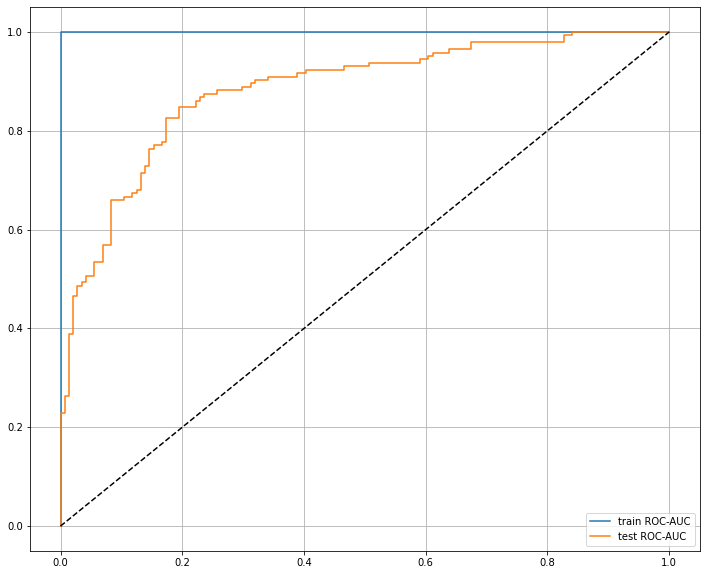

err_count_0 = 24 / 144, err_count_1 = 32 / 144
acc = 0.8055555555555556


In [19]:
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X_train_scaled, y_train)
plot_roc_curve(model, X_train_scaled, X_test_scaled, y_train, y_test)

err_counter(model, X_test_scaled, y_test)

## XGBClassifier

Train ROC-AUC: 1.0
Test  ROC-AUC: 0.89453125


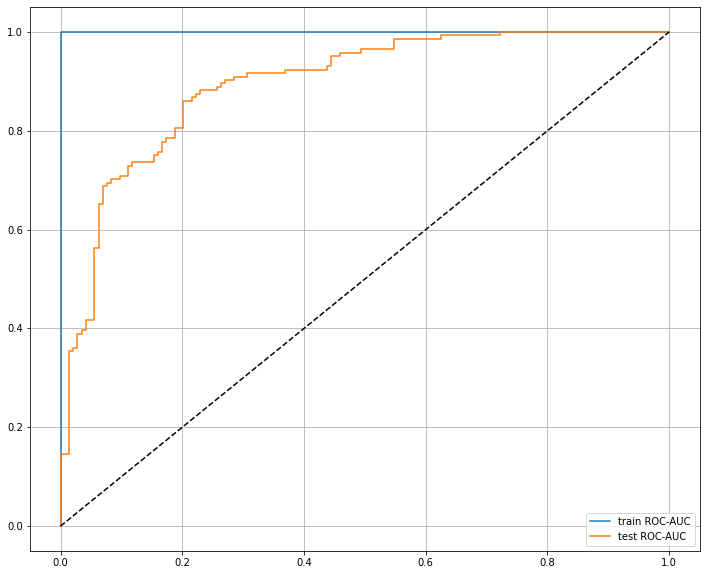

err_count_0 = 21 / 144, err_count_1 = 38 / 144
acc = 0.7951388888888888


In [20]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train_scaled, y_train)
plot_roc_curve(model, X_train_scaled, X_test_scaled, y_train, y_test)

err_counter(model, X_test_scaled, y_test)

## BaggingClassifier

Train ROC-AUC: 0.9979182304372303
Test  ROC-AUC: 0.904200424382716


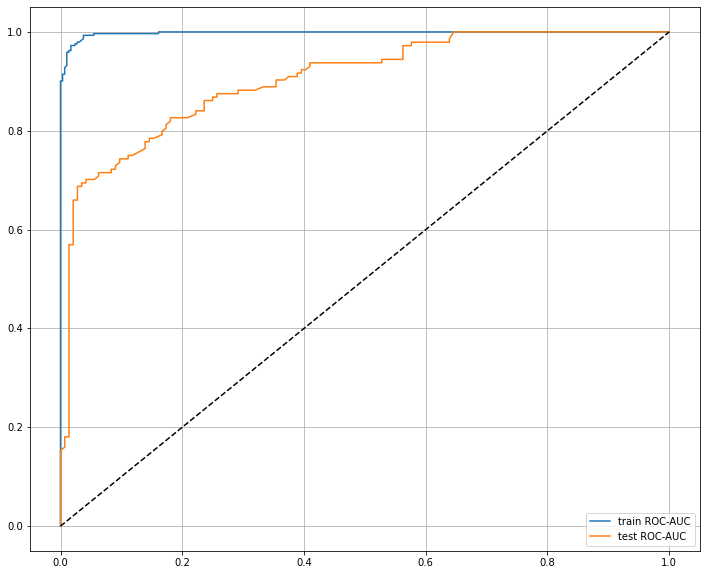

err_count_0 = 30 / 144, err_count_1 = 25 / 144
acc = 0.8090277777777778


In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

base_model = RandomForestClassifier(n_estimators=100, random_state=42)
model = BaggingClassifier(base_estimator=base_model, n_estimators=5, random_state=42)

model.fit(X_train_scaled, y_train)
plot_roc_curve(model, X_train_scaled, X_test_scaled, y_train, y_test)

err_counter(model, X_test_scaled, y_test)

# Кроссвалидация

In [27]:
from sklearn.model_selection import cross_val_score, cross_validate

In [28]:
base_model = CatBoostClassifier(verbose=False)
result = cross_validate(estimator=BaggingClassifier(base_estimator=base_model,
                                                    n_estimators=5, random_state=42),
                         X=X2, y=y2, 
                         scoring=('accuracy', 'roc_auc'),
                         cv=5)

print(f"Среднее accuracy равно {result['test_accuracy'].mean()}, стандартное отклонение accuracy равно {result['test_accuracy'].std()}")
print(f"Среднее roc_auc  равно {result['test_roc_auc'].mean()}, стандартное отклонение roc_auc  равно {result['test_roc_auc'].std()}")

Среднее accuracy равно 0.838279146141215, стандартное отклонение accuracy равно 0.049661586366061286
Среднее roc_auc  равно 0.9152593113056847, стандартное отклонение roc_auc  равно 0.03887984235901486


In [30]:
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
result = cross_validate(estimator=BaggingClassifier(base_estimator=base_model, n_estimators=5, random_state=42),
                         X=X2, y=y2, 
                         scoring=('accuracy', 'roc_auc'),
                         cv=5)
print(f"Среднее accuracy равно {result['test_accuracy'].mean()}, стандартное отклонение accuracy равно {result['test_accuracy'].std()}")
print(f"Среднее roc_auc  равно {result['test_roc_auc'].mean()}, стандартное отклонение roc_auc  равно {result['test_roc_auc'].std()}")

Среднее accuracy равно 0.830279146141215, стандартное отклонение accuracy равно 0.04187934639080301
Среднее roc_auc  равно 0.9066486806231158, стандартное отклонение roc_auc  равно 0.039478435772380194


# Тест

In [37]:
df_test = pd.read_csv('data/test.csv', index_col=[0], sep=';')
df_test.head()

,client_id,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663,id
report_date,,,,,,,,,,,,,,,,,,,,,
2023-04-01,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4941670.0,4941670.0,NaN,NaN,NaN,4941670.0,4941670.0,4941670.0,0.256919,0
2023-05-01,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11789500.0,11789500.0,NaN,NaN,NaN,11789500.0,11789500.0,11789500.0,0.267221,1
2023-05-01,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7000000.0,7000000.0,NaN,NaN,NaN,7000000.0,7000000.0,7000000.0,0.257217,2
2023-03-01,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261,3
2023-03-01,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10391000.0,10391000.0,10391000.0,0.257348,4


In [38]:
client_id = df_test.client_id
df_test = df_test[[x for x in df.columns if x != 'target']]
df_test

,col1453,col1455,col1456,col1457,col1458,col1459,col1460,col1461,col1462,col1463,...,col2564,col2565,col2566,col2588,col2589,col2590,col2660,col2661,col2662,col2663
report_date,,,,,,,,,,,,,,,,,,,,,
2023-04-01,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,4981252.0,4981252.0,4981252.0,240.0,240.0,240.0,4941670.0,4941670.0,4941670.0,0.256919
2023-05-01,0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,11789500.0,11789500.0,11789500.0,360.0,360.0,360.0,11789500.0,11789500.0,11789500.0,0.267221
2023-05-01,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,...,NaN,NaN,NaN,348.0,348.0,348.0,7000000.0,7000000.0,7000000.0,0.257217
2023-03-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
2023-03-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,10391000.0,10391000.0,10391000.0,362.0,362.0,362.0,10391000.0,10391000.0,10391000.0,0.257348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3500000.0,3500000.0,3500000.0,360.0,360.0,360.0,3500000.0,3500000.0,3500000.0,0.256261
2023-04-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
2023-03-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256919


In [40]:
#Заполняем пропуски
df_test.fillna(value=0,  inplace=True) 
df

,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,col1461,col1462,...,col2564,col2565,col2566,col2588,col2589,col2590,col2660,col2661,col2662,col2663
report_date,,,,,,,,,,,,,,,,,,,,,
2022-11-01,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256261
2022-11-01,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,5903704.0,5903704.0,5903704.0,362.0,362.0,362.0,7616803.0,7616803.0,7616803.0,0.256261
2022-05-01,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256261
2022-09-01,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258682
2022-08-01,0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,0,0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276902
2022-09-01,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.260516
2022-02-01,1,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.260005


In [41]:
client_id

report_date
2023-04-01       2
2023-05-01       4
2023-05-01       9
2023-03-01      12
2023-03-01      14
              ... 
2023-04-01    4366
2023-04-01    8298
2023-03-01     835
2023-03-01    8300
2023-05-01    1974
Name: client_id, Length: 3642, dtype: int64

In [54]:
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
model = BaggingClassifier(base_estimator=base_model, n_estimators=5, random_state=42)
model.fit(X_train_scaled, y_train)

#prediction = model.predict_proba(df_test)
prediction = model.predict(df_test)
prediction

array([0., 1., 0., ..., 0., 1., 1.])

In [55]:
prediction.shape

(3642,)

In [56]:
prediction[:, 1]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [44]:
client_id.shape

(3642,)

In [46]:
result = pd.DataFrame(client_id)
result

,client_id
report_date,
2023-04-01,2
2023-05-01,4
2023-05-01,9
2023-03-01,12
2023-03-01,14
...,...
2023-04-01,4366
2023-04-01,8298
2023-03-01,835


In [47]:
result['target'] = prediction[:, 1]
result

,client_id,target
report_date,,
2023-04-01,2,0.494
2023-05-01,4,0.542
2023-05-01,9,0.484
2023-03-01,12,0.464
2023-03-01,14,0.502
...,...,...
2023-04-01,4366,0.520
2023-04-01,8298,0.470
2023-03-01,835,0.440


In [49]:
result = result.rename(columns={"client_id": "id"})
result

,id,target
report_date,,
2023-04-01,2,0.494
2023-05-01,4,0.542
2023-05-01,9,0.484
2023-03-01,12,0.464
2023-03-01,14,0.502
...,...,...
2023-04-01,4366,0.520
2023-04-01,8298,0.470
2023-03-01,835,0.440


In [52]:
result.to_csv('data/result.csv', sep=';', index=False)

# 2

In [60]:
result2 = pd.DataFrame(client_id)
result2['target'] = prediction
result2 = result2.rename(columns={"client_id": "id"})
result2

result2.to_csv('data/result2.csv', sep=';', index=False)

In [62]:
result2.isna().sum()

id        0
target    0
dtype: int64